In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

----

# training data

## Overview

In [3]:
df_train = pd.read_csv("../data/raw/train.csv")

In [50]:
# Count the number of NaN values for each column
nan_counts = df_train.isnull().sum()

print(nan_counts)

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [4]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [48]:
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [5]:
df_train.shape

(188533, 13)

The training data contains 188533 rows and 13 columns

In [6]:
df_train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [7]:
category_features = ['brand', 'model', 'fuel_type', 'engine','transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

In [8]:
numerical_features = ['milage','price', 'model_year',]

---

In [84]:
# helper function

def show_statistic_details(df: pd.DataFrame, col_name: str): 
    mean = df.groupby(col_name)['price'].mean()
    std = df.groupby(col_name)['price'].std()
    counts = df.groupby(col_name).size().sort_values(ascending=False)
    
    # Sort the items by mean
    sorted_mean = mean.sort_values(ascending=False)

    # Print the sorted results
    for item in sorted_mean.index:
        item_mean = mean[item]
        item_std = std[item]
        item_counts = counts[item]
        percentage_std = (item_std / item_mean) * 100 if item_mean != 0 else 0
        print(f"{item}: Mean = {item_mean:.2f}, Std Dev = {item_std:.2f} ({percentage_std:.2f}%) ({item_counts})")
    

## car brand

In [9]:
brand_counts = df_train.groupby('brand').size().sort_values(ascending=False)

In [10]:
print(f"totally {len(brand_counts)} brands are included")

totally 57 brands are included


In [11]:
brand_counts/len(df_train)*100
# Cars in this dataset are mostly "Ford" (12%)

brand
Ford             12.246132
Mercedes-Benz    10.169042
BMW               9.031841
Chevrolet         8.664266
Audi              5.774586
Porsche           5.628723
Land              5.052166
Toyota            4.694138
Lexus             4.584343
Jeep              3.433882
Cadillac          2.479142
RAM               2.253717
Nissan            2.084516
Tesla             1.982677
INFINITI          1.737627
GMC               1.705272
Dodge             1.661778
Mazda             1.442188
Kia               1.324437
Lincoln           1.285186
Subaru            1.262909
Acura             1.210398
Honda             1.114394
Hyundai           1.084691
Volkswagen        0.936176
Jaguar            0.699612
Bentley           0.612625
MINI              0.564357
Genesis           0.513968
Buick             0.498586
Maserati          0.498056
Lamborghini       0.429103
Chrysler          0.385609
Volvo             0.383487
Alfa              0.361740
Rivian            0.312943
Rolls-Royce       0.29

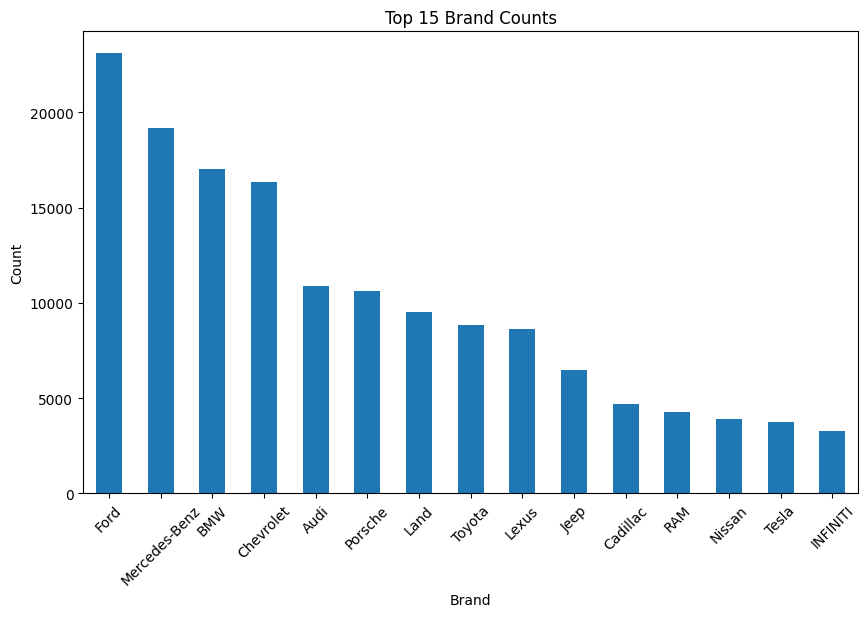

In [12]:
# Plot the first 15 brands
top_15_brands = brand_counts.head(15)
top_15_brands.plot(kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 15 Brand Counts')
plt.xticks(rotation=45)
# Show plot
plt.show()

In [85]:
show_statistic_details(df_train, "brand")
# 布加迪（法语：Bugatti），是法国一家超级跑车车厂，曾生产出世界上最快车，最原始的布加迪品牌已经在二战后消失，不过战后此品牌曾经有两度复兴，曾经是大众集团旗下的一个全资品牌，2021年与瑞马克汽车的跑车部门合并。

Bugatti: Mean = 169600.00, Std Dev = 82980.48 (48.93%) (7)
Lamborghini: Mean = 159176.01, Std Dev = 179716.86 (112.90%) (809)
Rolls-Royce: Mean = 135488.65, Std Dev = 178508.97 (131.75%) (561)
Bentley: Mean = 129272.93, Std Dev = 221562.66 (171.39%) (1155)
McLaren: Mean = 123261.24, Std Dev = 98033.99 (79.53%) (243)
Ferrari: Mean = 116751.01, Std Dev = 134929.62 (115.57%) (359)
Aston: Mean = 112364.59, Std Dev = 213527.99 (190.03%) (238)
Rivian: Mean = 81089.15, Std Dev = 57988.87 (71.51%) (590)
Porsche: Mean = 70899.95, Std Dev = 112993.04 (159.37%) (10612)
Lucid: Mean = 63310.36, Std Dev = 39558.84 (62.48%) (69)
Maserati: Mean = 61459.70, Std Dev = 67078.34 (109.14%) (939)
Tesla: Mean = 56445.27, Std Dev = 68630.09 (121.59%) (3738)
Maybach: Mean = 53566.33, Std Dev = 37370.60 (69.77%) (3)
Genesis: Mean = 53556.33, Std Dev = 74395.82 (138.91%) (969)
Land: Mean = 53204.88, Std Dev = 92001.94 (172.92%) (9525)
Alfa: Mean = 51993.10, Std Dev = 50643.53 (97.40%) (682)
RAM: Mean = 51290.73,

## model

In [14]:
model_counts = df_train.groupby('model').size().sort_values(ascending=False)
len(model_counts)

1897

In [15]:
model_counts/len(df_train)*100

model
F-150 XLT                        1.562061
M3 Base                          1.182286
Camaro 2SS                       0.906473
M4 Base                          0.860327
Mustang GT Premium               0.809407
                                   ...   
XLR V                            0.001061
X5 3.0i                          0.000530
Integra w/A-Spec Tech Package    0.000530
X5 xDrive40e                     0.000530
XLR Base                         0.000530
Length: 1897, dtype: float64

In [16]:
model_counts.index[0]

'F-150 XLT'

In [17]:
set(df_train.loc[df_train['model'] == model_counts.index[0], 'brand'].to_list())

{'Ford', 'Jaguar', 'Lexus', 'Mercury', 'Toyota'}

In [18]:
set(df_train.loc[df_train['model'] == model_counts.index[1], 'brand'].to_list())

{'Audi', 'BMW', 'Dodge', 'Ford', 'Mercedes-Benz', 'Nissan', 'Porsche', 'Tesla'}

It seems that a model can correspond to multiple brand

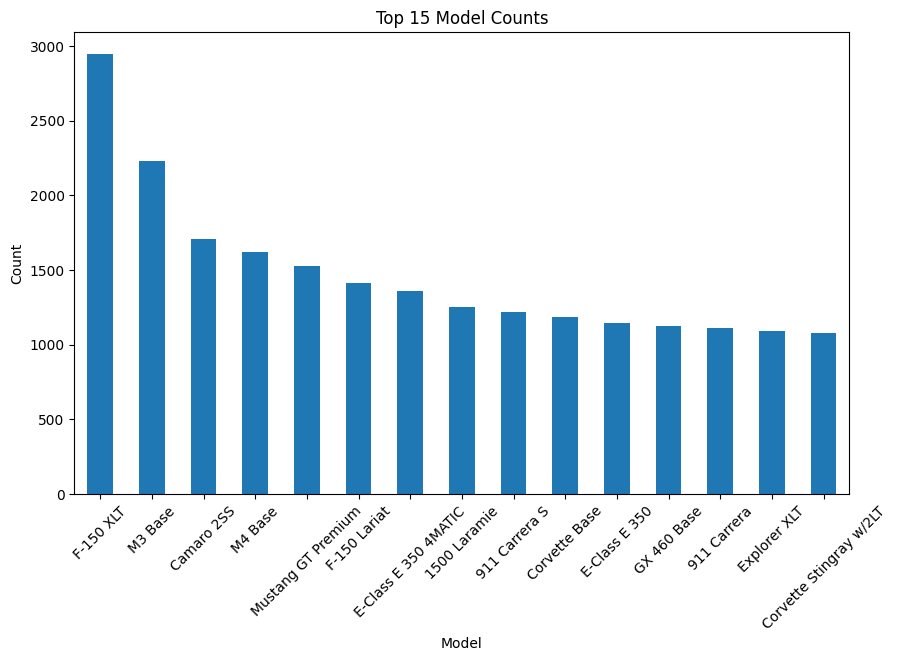

In [19]:
# Plot the first 15 brands
top_15_models = model_counts.head(15)
top_15_models.plot(kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 15 Model Counts')
plt.xticks(rotation=45)
# Show plot
plt.show()

In [49]:
df_train.groupby('model')['price'].mean().sort_values(ascending=False)

model
Carrera GT Base                    356937.250000
Gallardo SE                        265551.272727
Phantom Drophead Coupe Drophead    250358.269231
Continental GT GT Speed            244661.833333
Martin DB7 Vantage Volante         229714.312500
                                       ...      
Ram Van 1500                         8693.772727
Eurovan MV                           8245.571429
Yaris L                              8215.625000
Matrix XR                            7688.000000
Integra LS                           7683.117647
Name: price, Length: 1897, dtype: float64

In [86]:
show_statistic_details(df_train, "model")

Carrera GT Base: Mean = 356937.25, Std Dev = 550957.55 (154.36%) (8)
Gallardo SE: Mean = 265551.27, Std Dev = 351859.46 (132.50%) (22)
Phantom Drophead Coupe Drophead: Mean = 250358.27, Std Dev = 205407.18 (82.05%) (26)
Continental GT GT Speed: Mean = 244661.83, Std Dev = 440351.65 (179.98%) (18)
Martin DB7 Vantage Volante: Mean = 229714.31, Std Dev = 727232.91 (316.58%) (16)
Bentayga Speed: Mean = 220777.55, Std Dev = 216988.10 (98.28%) (76)
Rover LR4 Lux: Mean = 215266.13, Std Dev = 757751.21 (352.01%) (15)
Huracan EVO Coupe: Mean = 211282.96, Std Dev = 162250.80 (76.79%) (26)
Flying Spur V8: Mean = 211032.00, Std Dev = 162184.03 (76.85%) (28)
911 R: Mean = 206067.46, Std Dev = 400728.52 (194.46%) (63)
Phantom: Mean = 202962.03, Std Dev = 210653.98 (103.79%) (29)
Huracan Tecnica Coupe: Mean = 192124.62, Std Dev = 116944.88 (60.87%) (29)
Aventador LP750-4 Superveloce: Mean = 189270.73, Std Dev = 340208.27 (179.75%) (22)
812 Superfast Base: Mean = 188882.50, Std Dev = 153108.25 (81.06%

## model_year

In [21]:
year_counts = df_train.groupby('model_year').size().sort_values(ascending=False)

In [22]:
year_counts

model_year
2021    18198
2018    16414
2020    15848
2022    15749
2019    15409
2016    13696
2017    12794
2015    11389
2023     8769
2014     8415
2013     6796
2011     6265
2012     6095
2008     5156
2007     4876
2010     4235
2005     3129
2006     2814
2009     2716
2004     2570
2003     1906
2001     1534
2002     1282
2000      558
1999      554
1998      343
1997      312
1996      189
2024      162
1993      140
1995      102
1994       92
1992       14
1974       12
dtype: int64

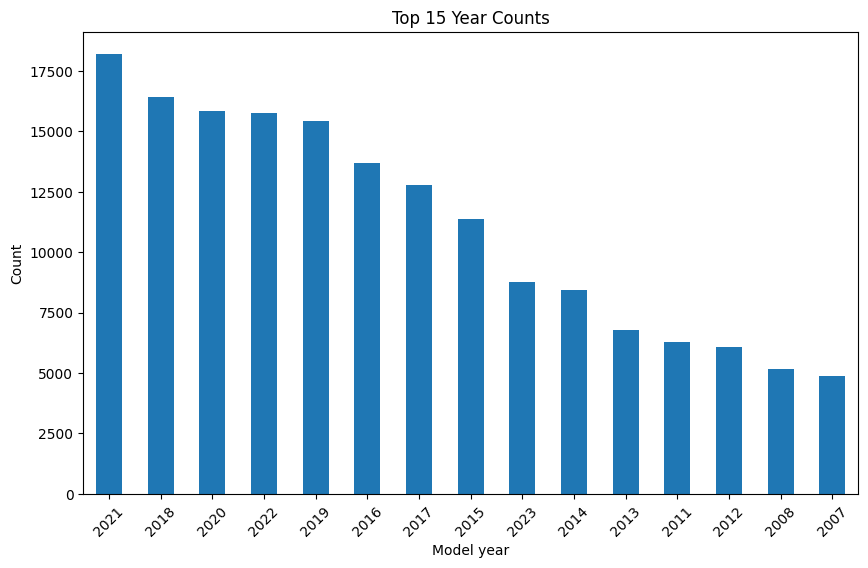

In [23]:
# Plot the first 15 brands
top_15_years = year_counts.head(15)
top_15_years.plot(kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Model year')
plt.ylabel('Count')
plt.title('Top 15 Year Counts')
plt.xticks(rotation=45)
# Show plot
plt.show()

In [28]:
set(df_train['model_year'].to_list())

{1974,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024}

In [25]:
df_train.groupby('model_year')['price'].mean().sort_values(ascending=False)

model_year
2023    95707.912305
2024    78006.067901
1974    74124.083333
2022    72732.327005
2021    65893.857951
2020    61556.784074
1994    50181.760870
2019    49375.295606
2018    47707.568722
1995    38205.872549
1993    38091.871429
2017    37943.234329
2016    33531.819655
2015    30974.878567
1992    26957.000000
2005    26376.852029
2014    24758.274866
2013    23437.342702
2009    21522.417894
2002    21286.650546
2008    20384.406711
2010    19964.660449
2012    19806.953897
2007    19449.327112
2004    19401.310506
2001    19227.459583
2006    18351.585288
2011    18084.812450
1996    17370.894180
2003    17021.920252
1997    14586.419872
2000    13796.912186
1998    13442.169096
1999    10702.705776
Name: price, dtype: float64

Text(0.5, 1.0, 'Year Distribution')

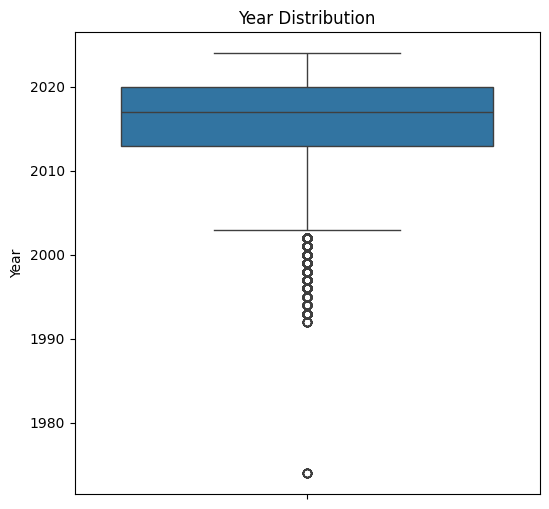

In [36]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='model_year', data=df_train)
plt.ylabel('Year')
plt.title('Year Distribution')

# The year of the cars are mostly between 2010-1020

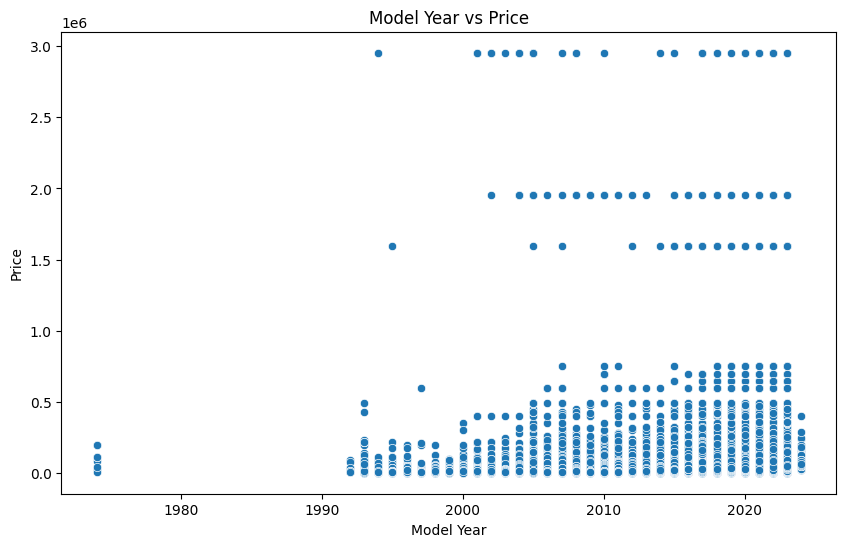

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='price', data=df_train)
plt.title('Model Year vs Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

In [87]:
show_statistic_details(df_train, "model_year")

2023: Mean = 95707.91, Std Dev = 106759.67 (111.55%) (8769)
2024: Mean = 78006.07, Std Dev = 47818.26 (61.30%) (162)
1974: Mean = 74124.08, Std Dev = 68266.67 (92.10%) (12)
2022: Mean = 72732.33, Std Dev = 103101.21 (141.75%) (15749)
2021: Mean = 65893.86, Std Dev = 93183.06 (141.41%) (18198)
2020: Mean = 61556.78, Std Dev = 76525.25 (124.32%) (15848)
1994: Mean = 50181.76, Std Dev = 306852.62 (611.48%) (92)
2019: Mean = 49375.30, Std Dev = 58607.32 (118.70%) (15409)
2018: Mean = 47707.57, Std Dev = 65528.11 (137.35%) (16414)
1995: Mean = 38205.87, Std Dev = 160124.76 (419.11%) (102)
1993: Mean = 38091.87, Std Dev = 70700.60 (185.61%) (140)
2017: Mean = 37943.23, Std Dev = 65091.68 (171.55%) (12794)
2016: Mean = 33531.82, Std Dev = 59449.53 (177.29%) (13696)
2015: Mean = 30974.88, Std Dev = 55549.59 (179.34%) (11389)
1992: Mean = 26957.00, Std Dev = 27142.23 (100.69%) (14)
2005: Mean = 26376.85, Std Dev = 149048.06 (565.07%) (3129)
2014: Mean = 24758.27, Std Dev = 43692.70 (176.48%) (8

## Milage

In [38]:
milage_counts = df_train.groupby('milage').size().sort_values(ascending=False)

<Axes: ylabel='milage'>

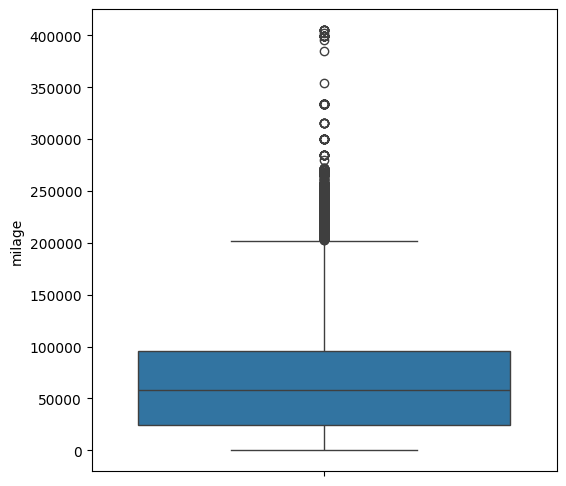

In [42]:
# Create a box plot to show the distribution of prices without grouping
plt.figure(figsize=(6, 6))
sns.boxplot(y='milage', data=df_train)
# the milage is mostly raging in 30000~100000

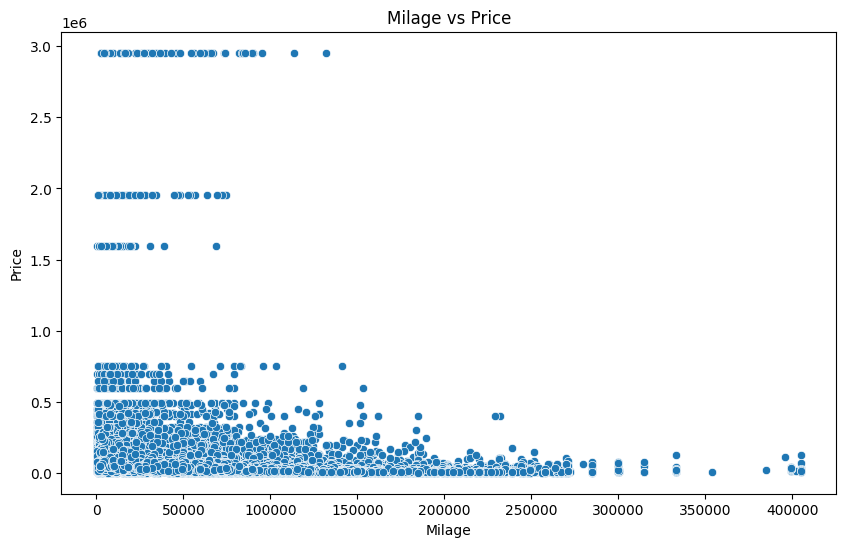

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='milage', y='price', data=df_train)
plt.title('Milage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()
# Some 

## fuel_type

In [46]:
set(df_train['fuel_type'].to_list())

{'Diesel',
 'E85 Flex Fuel',
 'Gasoline',
 'Hybrid',
 'Plug-In Hybrid',
 nan,
 'not supported',
 '–'}

In [ ]:
df_train

In [52]:
fuel_type_counts = df_train.groupby('fuel_type').size().sort_values(ascending=False)
fuel_type_counts

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
dtype: int64

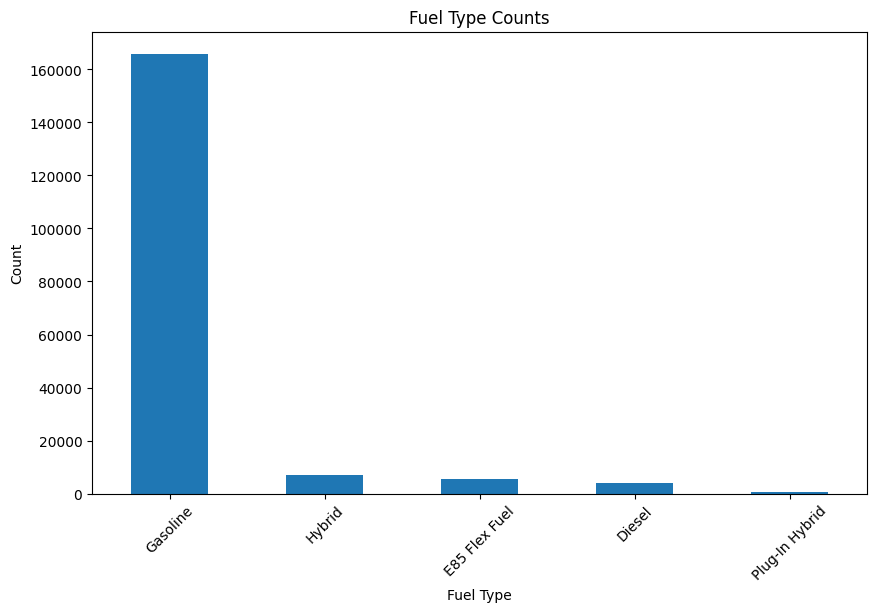

In [61]:
# Plot the first 15 brands
fuel_type_counts.plot(kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Counts')
plt.xticks(rotation=45)
# Show plot
plt.show()

- **Gasoline**
- **Hybrid**
- **E85 Flex Fuel**:  ethanol fuel blend containing up to 85% ethanol and 15% gasoline.
- **Diesel**: common in trucks and heavy-duty vehicles 
- **Plug-In Hybrid** :use both a gasoline engine and a rechargeable electric battery

In [57]:
df_train_2 = df_train.copy()
df_train_2['fuel_type'] = df_train_2['fuel_type'].replace('–', np.nan)
df_train_2['fuel_type'] = df_train_2['fuel_type'].replace('not supported', np.nan)



In [60]:
fuel_type_counts = df_train_2.groupby('fuel_type').size().sort_values(ascending=False)
fuel_type_counts

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
Plug-In Hybrid       521
dtype: int64

In [89]:
show_statistic_details(df_train_2, "fuel_type")

# Hybrid is most expensive
# Diesel is secondly expensive but may becuz they are heavy
# E85 Flex Fuel cars tend to be cheaper

Hybrid: Mean = 55473.45, Std Dev = 57999.20 (104.55%) (6832)
Diesel: Mean = 48769.59, Std Dev = 93900.22 (192.54%) (3955)
Plug-In Hybrid: Mean = 44150.97, Std Dev = 29218.46 (66.18%) (521)
Gasoline: Mean = 43360.01, Std Dev = 79805.75 (184.05%) (165940)
E85 Flex Fuel: Mean = 26729.76, Std Dev = 54669.86 (204.53%) (5406)


## engine

In [63]:
df_train['engine'].to_list()

['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability',
 '420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel',
 '208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
 '355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability',
 '2.7L V6 24V PDI DOHC Twin Turbo',
 '425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
 '312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel',
 'Electric Motor Electric Fuel System',
 '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel',
 '333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
 '523.0HP 4.4L 8 Cylinder Engine Gasoline Fuel',
 '503.0HP 4.0L 8 Cylinder Engine Gasoline Fuel',
 '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel',
 '395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
 '310.0HP 4.6L 8 Cylinder Engine Gasoline Fuel',
 '469.0HP 4.0L 8 Cylinder Engine Gasolin